# ÁRBOLES DE DECISIÓN

## 1. Introducción

Los **árboles de decisión** son modelos no paramétricos utilizados tanto para **clasificación** como para **regresión**. Su objetivo es dividir el espacio de características en regiones homogéneas con respecto a la variable objetivo.

Un árbol consiste en **nodos internos** que representan decisiones sobre las variables de entrada y **hojas** que representan salidas o predicciones.

Formalmente, dado un conjunto de entrenamiento $\mathcal{D} = \{(x_i, y_i)\}_{i=1}^n$, el algoritmo busca un conjunto de reglas de partición que minimicen la impureza dentro de los nodos hijos:

$$
\text{Impureza}(S) = \sum_{k=1}^K p_k(1 - p_k), \quad \text{donde } p_k \text{ es la proporción de la clase } k.
$$

Los árboles son intuitivos, interpretables y pueden manejar tanto variables numéricas como categóricas.

## 2. Representación del Árbol de Decisión

Cada nodo interno representa una regla de decisión de la forma:

$$
x_j \leq t_j
$$

donde $x_j$ es una característica y $t_j$ es un umbral. El espacio de entrada se divide recursivamente en regiones $R_1, R_2, \dots, R_m$, y en cada región se asigna un valor de predicción.

En clasificación, se predice la clase más frecuente en cada región; en regresión, el promedio de los valores de salida.

## 3. Ganancia de Información

La **ganancia de información** mide la reducción de la incertidumbre (entropía) al realizar una partición. Se define como:

$$
IG(S, A) = H(S) - \sum_{v \in \text{Valores}(A)} \frac{|S_v|}{|S|} H(S_v)
$$

donde $H(S)$ es la **entropía** del conjunto de datos original, y $H(S_v)$ la entropía de los subconjuntos tras dividir por el atributo $A$.

## 4. Entropía

La entropía mide la **impureza** o incertidumbre de un conjunto de datos:

$$
H(S) = -\sum_{k=1}^K p_k \log_2(p_k)
$$

donde $p_k$ es la proporción de instancias de la clase $k$. Si todas las instancias pertenecen a una sola clase, $H(S) = 0$ (máxima pureza).

In [1]:
# Ejemplo ilustrativo de entropía y ganancia de información
import numpy as np

def entropy(p):
    p = np.array(p)
    p = p[p > 0]
    return -np.sum(p * np.log2(p))

# Ejemplo: conjunto con clases [Yes, No]
S = [9, 5]
p = [s / sum(S) for s in S]
H_S = entropy(p)
print(f"Entropía del conjunto S: {H_S:.3f}")

Entropía del conjunto S: 0.940


## 5. Ejemplo Ilustrativo

Supongamos un conjunto de datos simple para predecir si un estudiante aprueba según el número de horas de estudio y asistencia.

El algoritmo de árbol:
1. Evalúa todas las posibles divisiones.
2. Calcula la ganancia de información para cada una.
3. Escoge la que maximiza la ganancia.
4. Repite el proceso recursivamente hasta cumplir un criterio de parada (profundidad, mínimo de muestras, etc.).

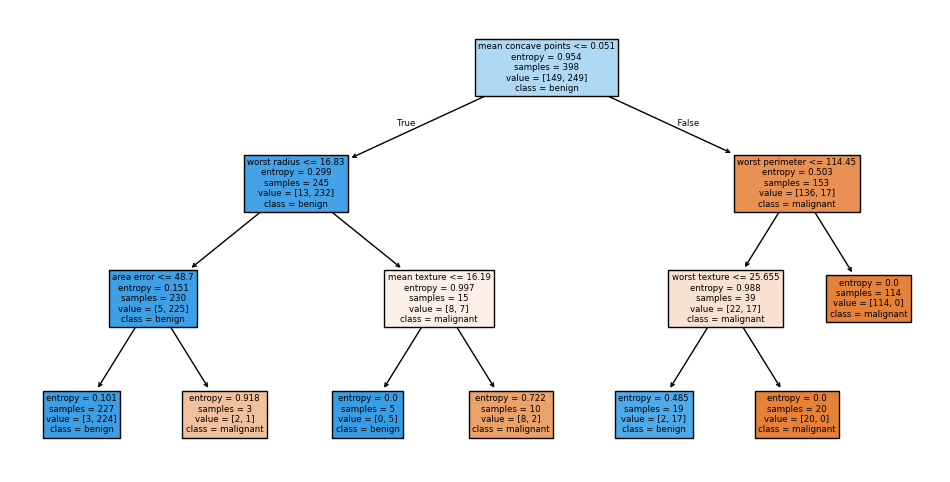

In [2]:
# Ejemplo práctico: Clasificación binaria con árbol de decisión
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree(clf, filled=True, feature_names=load_breast_cancer().feature_names, class_names=load_breast_cancer().target_names)
plt.show()

## 6. Algoritmo de Árboles de Decisión para Clasificación

### Criterio de división
- **Entropía:** mide la impureza basada en la teoría de la información.
- **Índice de Gini:**
$$
G(S) = 1 - \sum_{k=1}^K p_k^2
$$

Ambos criterios son equivalentes en la práctica, aunque Gini es más eficiente computacionalmente.

### Predicción
Una vez construido el árbol, la predicción de una instancia $x$ es la clase mayoritaria en la hoja correspondiente.

In [3]:
# Implementación en sklearn
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## 7. Algoritmo de Árboles de Decisión para Regresión

En el caso de regresión, el árbol busca dividir el espacio de entrada de modo que minimice el **error cuadrático medio (MSE)** en cada región:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Cada hoja predice el promedio de los valores de $y_i$ en su región.

In [4]:
# Ejemplo: Árbol de regresión
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = DecisionTreeRegressor(max_depth=4, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.3f}")

MSE: 3649.424


## 8. Algoritmo XGBoost

El algoritmo **XGBoost (Extreme Gradient Boosting)** es una extensión del modelo de árboles que combina múltiples árboles débiles en un **ensamble** para mejorar el rendimiento.

### Idea general
XGBoost minimiza una función objetivo compuesta por una pérdida $L$ y un término de regularización $\Omega$:

$$
\text{Obj} = \sum_{i=1}^n L(y_i, \hat{y}_i^{(t)}) + \sum_{k=1}^t \Omega(f_k)
$$

donde $f_k$ son los árboles individuales y $\Omega$ penaliza la complejidad del modelo.

La optimización se realiza de forma aditiva: cada nuevo árbol corrige los errores del conjunto anterior.

In [ ]:
# Ejemplo práctico con XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy con XGBoost: {acc:.3f}")

---
### Bibliografía recomendada
- Quinlan, J. R. (1986). *Induction of Decision Trees*. Machine Learning.
- Breiman, L. et al. (1984). *Classification and Regression Trees*. Wadsworth.
- Chen, T., & Guestrin, C. (2016). *XGBoost: A Scalable Tree Boosting System*. KDD.